### KNN-classification_1, I will use Mammographic (https://github.com/MachineLearningBCAM/Datasets/tree/main/data/binary_class_datasets). There is in kaggle available the same dataset but after cleaning (https://www.kaggle.com/datasets/overratedgman/mammographic-mass-data-set/data). I will use hte uncleaned one. The dataset contains 830 rows and 6 columns. The target variable "Severity" is balanced, making it suitable for use with the KNN algorithm.

### 

In [52]:
# usual imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline

# since we're doing KNN-classification:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [53]:
# load data 
df = pd.read_csv("Mammographic_1.csv")

In [54]:
# let's take a look at the data
# we can see that all values are numeric, either ordinal or encoded categorical, no text are presented.
df.head()

,,961,5,begnin,malignant
5.0,67.0,3.0,5.0,3.0,1
4.0,43.0,1.0,1.0,NaN,1
5.0,58.0,4.0,5.0,3.0,1
4.0,28.0,1.0,1.0,3.0,0
5.0,74.0,1.0,5.0,NaN,1


In [55]:
# first I will rename the columnss: 
df = pd.read_csv("mammographic_1.csv", skiprows=1, header=None)
df.columns = ["BI-RADS", "Age", "Shape", "Margin", "Density", "Severity"]

In [68]:
df.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BI-RADS   959 non-null    float64
 1   Age       956 non-null    float64
 2   Shape     930 non-null    float64
 3   Margin    913 non-null    float64
 4   Density   885 non-null    float64
 5   Severity  961 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 45.2 KB


In [58]:
# checking for missing values
df.isna().sum()

BI-RADS      2
Age          5
Shape       31
Margin      48
Density     76
Severity     0
dtype: int64

In [59]:
# checking "age" variable:
df["Age"].value_counts()

Age
59.0    36
67.0    32
57.0    32
66.0    31
46.0    28
        ..
18.0     1
82.0     1
93.0     1
96.0     1
20.0     1
Name: count, Length: 73, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

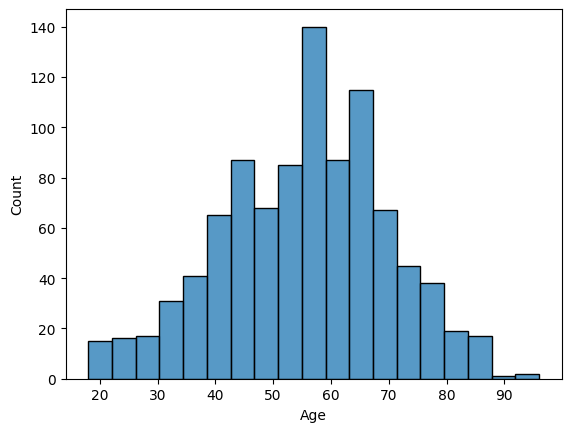

In [60]:
#distribution of "Age" variable is normal:
sns.histplot(df['Age'])

In [61]:
# checking the target variable "Severity":
# It is balanced, with 0 and 1 being the two classes. (0 = benign, 1 = malignant)
df["Severity"].value_counts()

Severity
0    516
1    445
Name: count, dtype: int64

In [62]:
# BI-RADS variable:
# We can see that the values 4 and 5 are the most frequently represented. For the model lower values can be important, 
# i will check if this variable correlate with the target variable.
df["BI-RADS"].value_counts()

BI-RADS
4.0     547
5.0     345
3.0      36
2.0      14
6.0      11
0.0       5
55.0      1
Name: count, dtype: int64

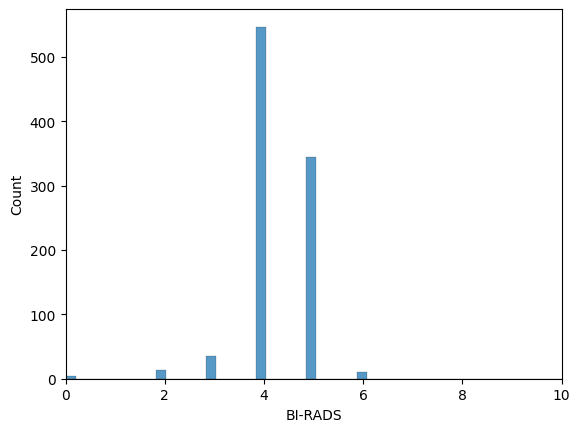

In [63]:
import matplotlib.pyplot as plt

sns.histplot(df['BI-RADS'])
plt.xlim(0, 10) 
plt.show()


<Axes: xlabel='Shape', ylabel='Count'>

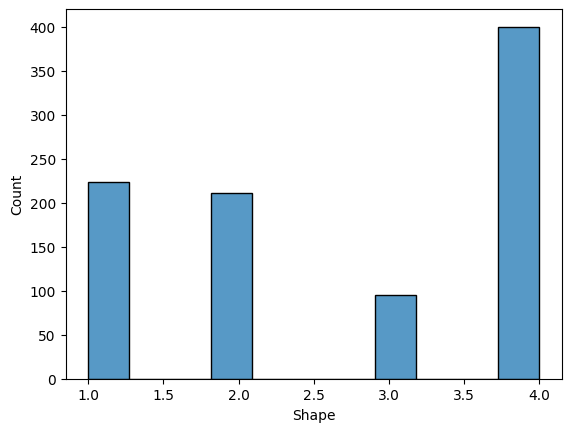

In [64]:
# checking "Shape" variable:
# Value 4 represents the most frequent
sns.histplot(df['Shape'])

<Axes: xlabel='Margin', ylabel='Count'>

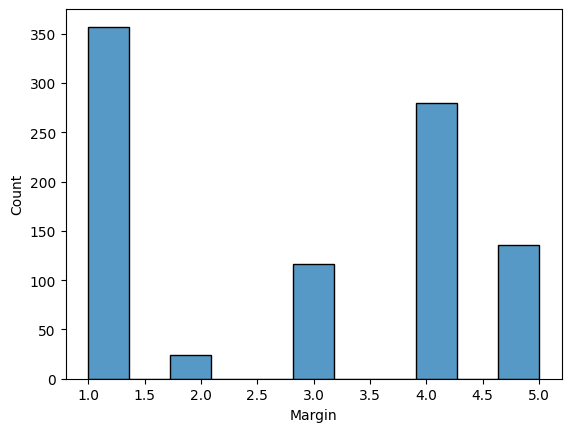

In [65]:
#Margin variable:
# Value 1 represents the most frequent
sns.histplot(df['Margin'])

<Axes: xlabel='Density', ylabel='Count'>

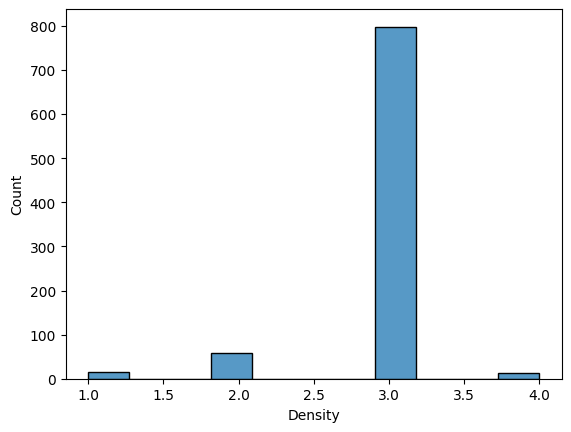

In [66]:
# for the "Density" variable we can see that value 3 is stays out of all the others:
sns.histplot(df['Density'])

<Axes: >

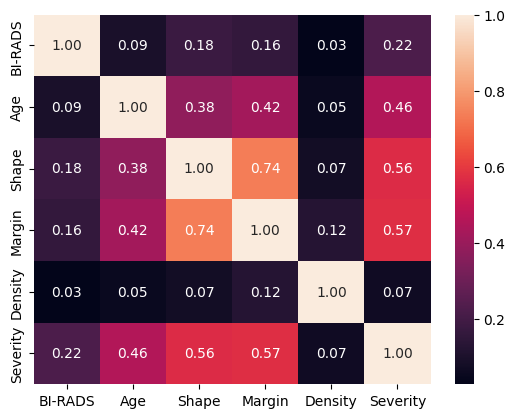

In [67]:
# on this correlation matrix we can see the most important supported variables:
# "Shape" and  "Margin". "Density" has very poor correlation with the target variable, so we can drop this column. 
# Also, we can keep the "BI-RADS" variable but consider dropping it later.
ions = df.corr(numeric_only=True)
sns.heatmap(correlations, annot=True, fmt='.2f')